<a href="https://colab.research.google.com/github/Sid-2862/ML9/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series Decomposition

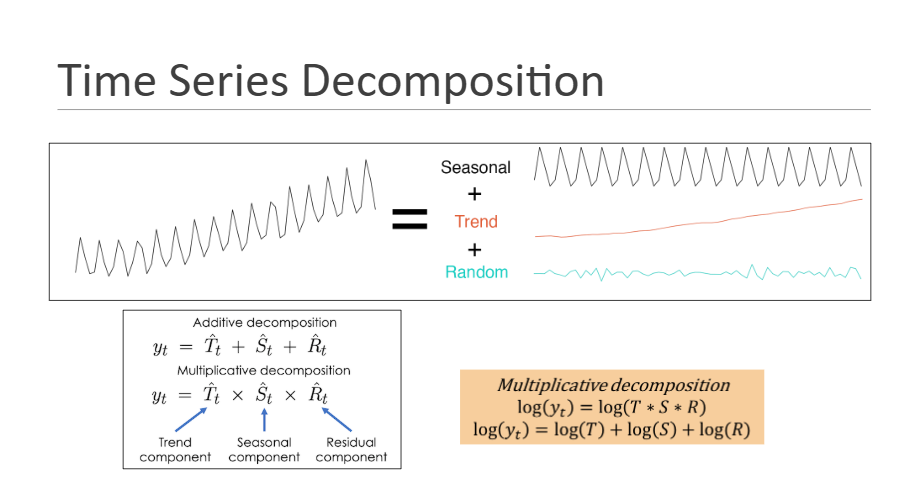

In [2]:
## install below packages as per versions pip install numpy==1.24.4 pip install pmdarima==2.0.3
%pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 w

In [3]:
%pip install pmdarima==2.0.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00


## Data Ingestion

In [1]:
import pandas as pd
url = r'https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/AirPassengers.csv'
df = pd.read_csv(url,index_col="Month",parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.resample("YE").sum()

,Passengers
Month,
1949-12-31,1520
1950-12-31,1676
1951-12-31,2042
1952-12-31,2364
1953-12-31,2700
1954-12-31,2867
1955-12-31,3408
1956-12-31,3939
1957-12-31,4421


In [3]:
df.resample("YE").mean()

,Passengers
Month,
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667


In [4]:
df.resample("QE").mean()

,Passengers
Month,
1949-03-31,120.666667
1949-06-30,128.333333
1949-09-30,144.000000
1949-12-31,113.666667
1950-03-31,127.333333
1950-06-30,136.333333
1950-09-30,166.000000
1950-12-31,129.000000
1951-03-31,157.666667


## Visualize the time Series
    seasonality
    trend
    Residual => Noise => Random

In [5]:
import matplotlib.pyplot as plt


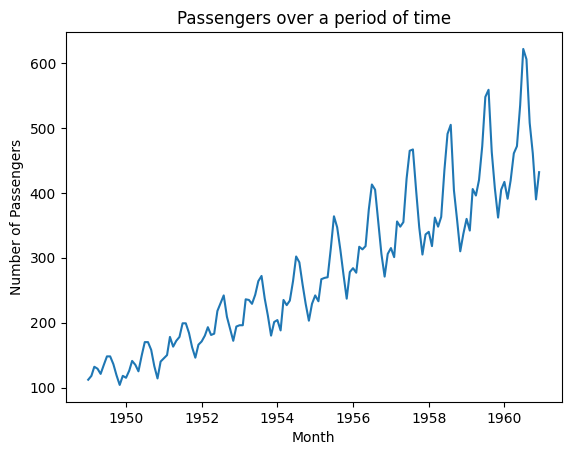

In [6]:
plt.plot(df["Passengers"])
plt.title("Passengers over a period of time")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()

1. Decomposition

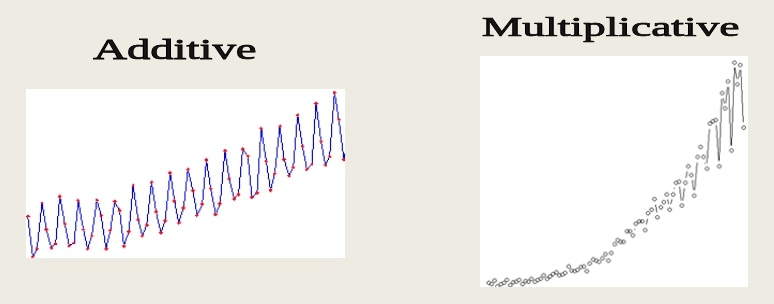

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

<function matplotlib.pyplot.show(close=None, block=None)>

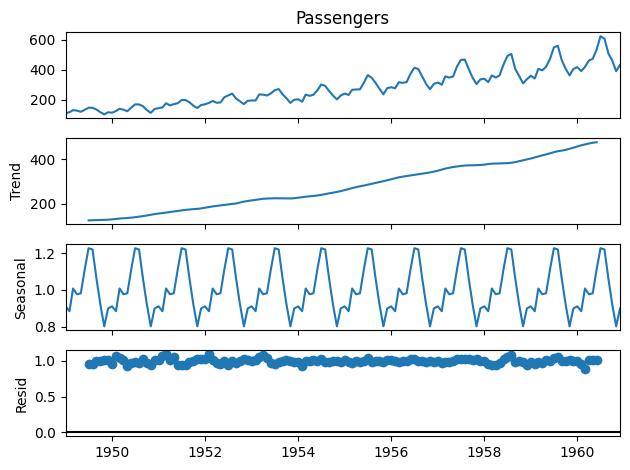

In [8]:
s = seasonal_decompose(df["Passengers"],model="mul")
s.plot()
plt.show

## Trend

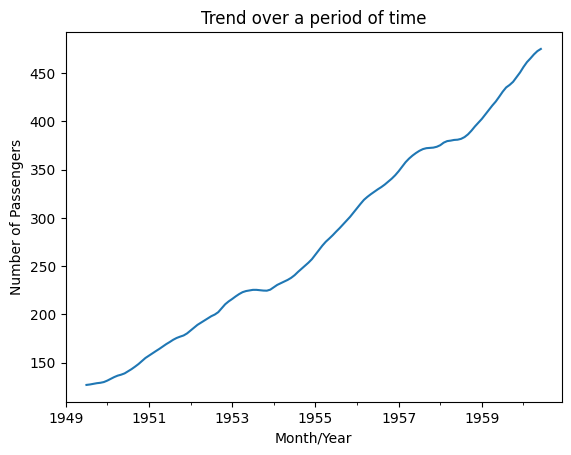

In [9]:
s.trend.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Trend over a period of time")
plt.show()

## Seasonal

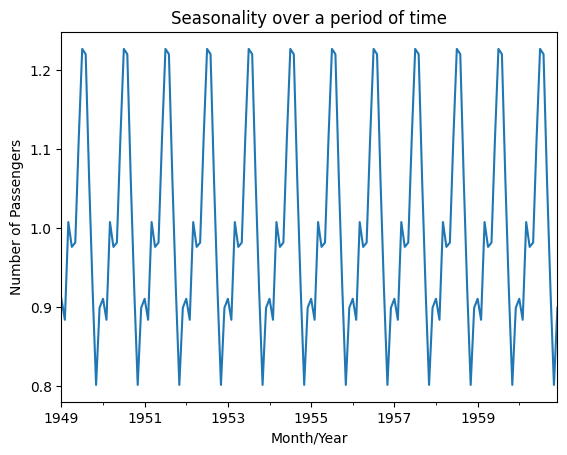

In [10]:
s.seasonal.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Seasonality over a period of time")
plt.show()

## Residual

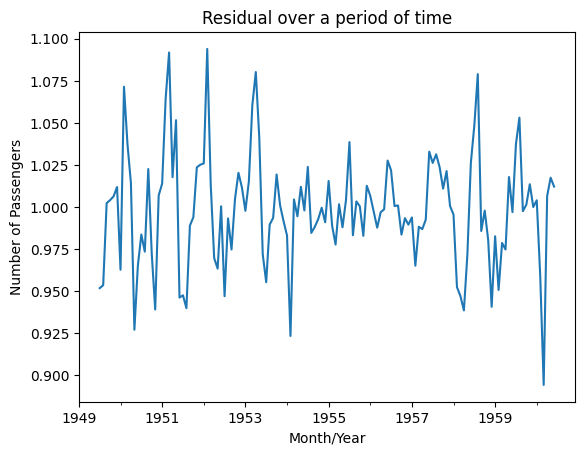

In [11]:
s.resid.plot()
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Residual over a period of time")
plt.show()

## Forecasting Model

In [12]:
from pmdarima.arima import auto_arima

In [13]:
model = auto_arima(df["Passengers"],seasonal=True,m=12,trace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=2.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.05 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.69 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,1,0)[12]             : AIC=1019.084, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=1023.666, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,1,0)[12]             : AIC=1021.083, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.87 sec

Best model:  ARIMA(2,1,1)(0,1,0)[12]          
Total fit time: 11.629 seconds


## Model with p,d,q which gives the lowest AIC score is considered as the best model

In [14]:
model.order

(2, 1, 1)

## Forecast for next 3 years
months = 3*12 = 36

In [15]:
months = 36
forecast,conf = model.predict(n_periods=36,return_conf_int=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [16]:
forecast

,0
1961-01-01,445.635594
1961-02-01,420.396104
1961-03-01,449.199806
1961-04-01,491.841747
1961-05-01,503.396536
1961-06-01,566.864725
1961-07-01,654.262629
1961-08-01,638.600088
1961-09-01,540.886464
1961-10-01,494.129445


In [17]:
conf

array([[423.34523521, 467.92595332],
       [394.23590755, 446.55630086],
       [419.83239581, 478.56721588],
       [460.37704501, 523.3064482 ],
       [470.38130721, 536.41176494],
       [532.70020826, 601.0292422 ],
       [619.22202722, 689.30323049],
       [602.88071771, 674.31945875],
       [504.63206491, 577.14086366],
       [457.44665543, 530.81223374],
       [386.30449498, 460.366738  ],
       [428.19189793, 502.8292083 ],
       [433.49833819, 525.09082508],
       [405.10964254, 503.25243405],
       [431.15636362, 535.0268484 ],
       [471.8411855 , 579.80726019],
       [481.87409883, 593.03780349],
       [544.15696957, 657.82187659],
       [630.60898302, 746.2764555 ],
       [614.17921217, 731.47514651],
       [515.83225506, 634.47461611],
       [468.5437597 , 588.31674892],
       [397.29671595, 518.03356042],
       [439.07918042, 560.64969355],
       [446.32655549, 581.01171822],
       [418.3174398 , 558.82882659],
       [444.62328428, 590.37388246],
 

In [18]:
df_forecast = forecast.to_frame()
df_forecast.columns = ["Forecast Passengers"]
df_forecast.index.name = "Month"
df_forecast

,Forecast Passengers
Month,
1961-01-01,445.635594
1961-02-01,420.396104
1961-03-01,449.199806
1961-04-01,491.841747
1961-05-01,503.396536
1961-06-01,566.864725
1961-07-01,654.262629
1961-08-01,638.600088
1961-09-01,540.886464


In [19]:
df_forecast[["Lower Confidence Bound","Upper Confidence Bound"]] = conf
df_forecast

,Forecast Passengers,Lower Confidence Bound,Upper Confidence Bound
Month,,,
1961-01-01,445.635594,423.345235,467.925953
1961-02-01,420.396104,394.235908,446.556301
1961-03-01,449.199806,419.832396,478.567216
1961-04-01,491.841747,460.377045,523.306448
1961-05-01,503.396536,470.381307,536.411765
1961-06-01,566.864725,532.700208,601.029242
1961-07-01,654.262629,619.222027,689.303230
1961-08-01,638.600088,602.880718,674.319459
1961-09-01,540.886464,504.632065,577.140864


## Visualizt the plot

In [20]:
df_forecast.columns

Index(['Forecast Passengers', 'Lower Confidence Bound',
       'Upper Confidence Bound'],
      dtype='object')

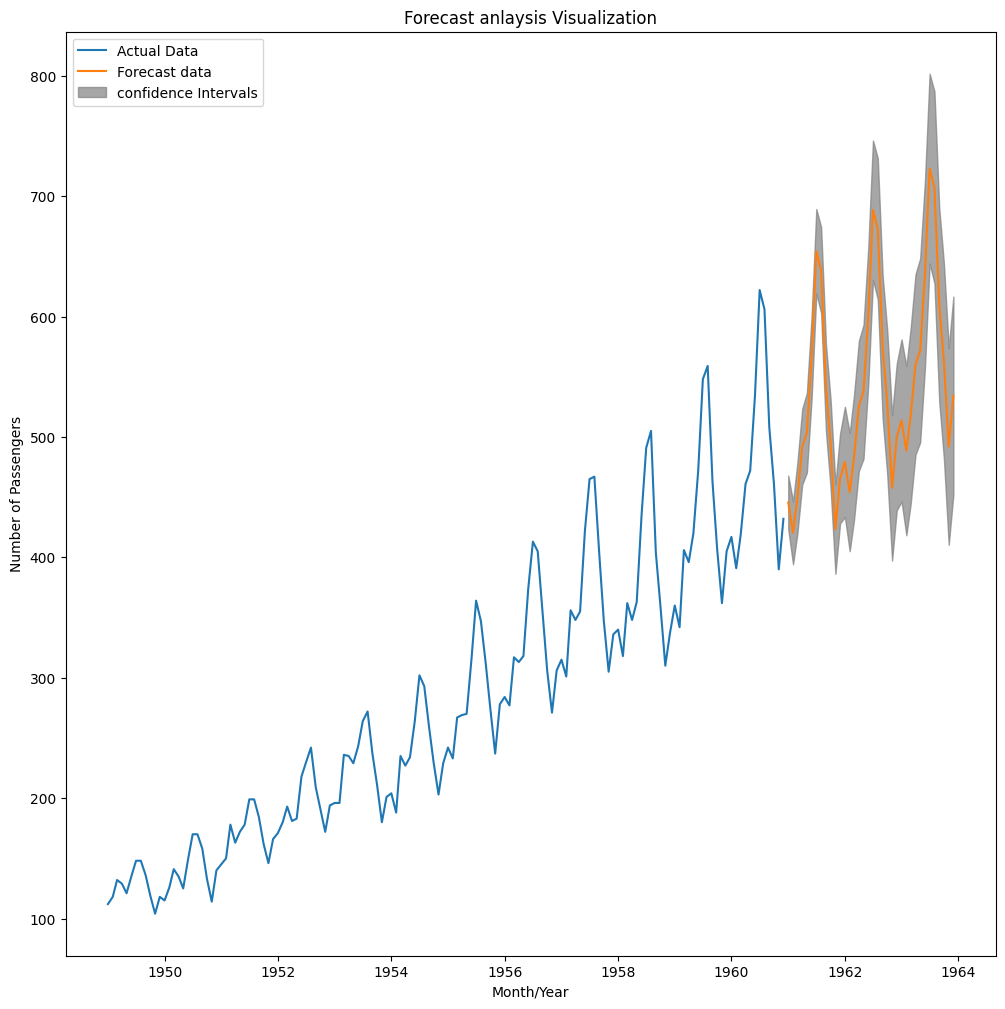

In [21]:
plt.figure(figsize=(12,12))
plt.plot(df["Passengers"],label="Actual Data")
plt.plot(df_forecast["Forecast Passengers"],label="Forecast data")
plt.fill_between(df_forecast.index,df_forecast["Lower Confidence Bound"],df_forecast["Upper Confidence Bound"],color="gray",
                 alpha=0.7,label="confidence Intervals")
plt.xlabel("Month/Year")
plt.ylabel("Number of Passengers")
plt.title("Forecast anlaysis Visualization")
plt.legend()
plt.show()

In [22]:
df_forecast.to_csv("Forecasted Results.csv")